In [40]:
import os
import cv2
import imghdr
import tensorflow as tf

In [6]:
import pathlib

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [8]:
# Define relative path from the current notebook location to the data_set directory
dataset_path = os.path.join('..', '..', 'data_set')

# Get the full absolute path to the data_set directory
full_path = os.path.abspath(dataset_path)

# List the directories in the data_set directory
directories = os.listdir(full_path)

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(dataset_path):
  print(image_class)

for image_class in os.listdir(dataset_path): 
   
    image_path = os.path.join(dataset_path, image_class)
    try: 
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts: 
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
    except Exception as e: 
        print('Issue with image {}'.format(image_path))

train
validation
Issue with image ../../data_set/train
Issue with image ../../data_set/validation


In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory(dataset_path, labels='inferred')

Found 19 files belonging to 2 classes.


2023-04-04 22:17:19.761723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]
2023-04-04 22:17:19.762259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]


237.14847

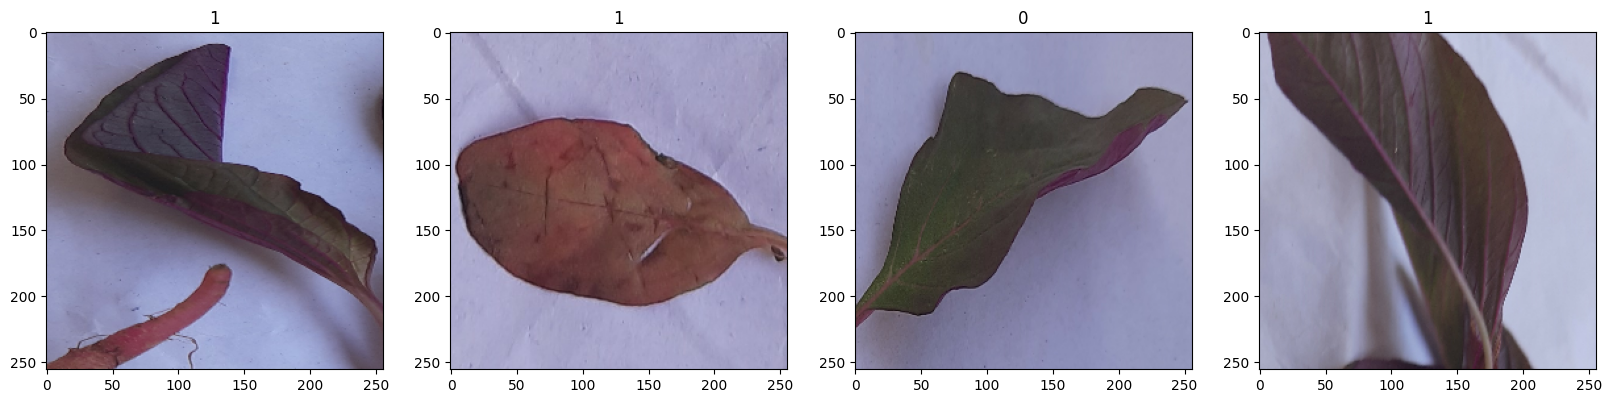

In [12]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

len(batch)

batch[0].shape

batch[1]

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

batch[0].max()

In [13]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()[0].max()

2023-04-04 22:17:21.073824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]
2023-04-04 22:17:21.074422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]


0.929994

In [14]:
len(data)

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train_size+val_size+test_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

len(train)

0

In [23]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(8, activation='softmax')
])

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [25]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [30]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(full_path, target_size=(256, 256), batch_size=32, class_mode='sparse')

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(full_path, target_size=(256, 256), batch_size=32, class_mode='sparse')

Found 19 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [32]:
hist = model.fit(train_data, epochs=8, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/8


2023-04-04 22:46:12.381082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - ETA: 0s - loss: 0.5467 - accuracy: 0.5789

2023-04-04 22:46:13.676402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step - loss: 0.5467 - accuracy: 0.5789 - val_loss: 0.4986 - val_accuracy: 0.6316
Epoch 2/8
1/1 [==============================] - 1s 1s/step - loss: 0.4986 - accuracy: 0.6316 - val_loss: 0.4292 - val_accuracy: 0.8947
Epoch 3/8
1/1 [==============================] - 1s 1s/step - loss: 0.4292 - accuracy: 0.8947 - val_loss: 0.4041 - val_accuracy: 0.9474
Epoch 4/8
1/1 [==============================] - 1s 1s/step - loss: 0.4041 - accuracy: 0.9474 - val_loss: 0.3569 - val_accuracy: 0.9474
Epoch 5/8
1/1 [==============================] - 1s 1s/step - loss: 0.3569 - accuracy: 0.9474 - val_loss: 0.3075 - val_accuracy: 0.9474
Epoch 6/8
1/1 [==============================] - 1s 1s/step - loss: 0.3075 - accuracy: 0.9474 - val_loss: 0.2813 - val_accuracy: 0.9474
Epoch 7/8
1/1 [==============================] - 1s 1s/step - loss: 0.2813 - accuracy: 0.9474 - val_loss: 0.2292 - val_accuracy: 0.9474
Epoch 8/8
1/1 [==============================] - 2s 2s/ste

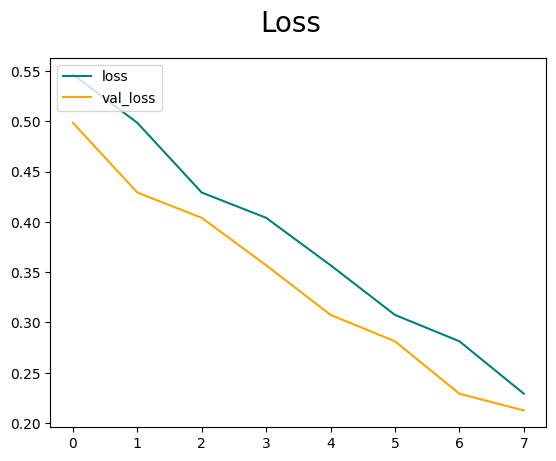

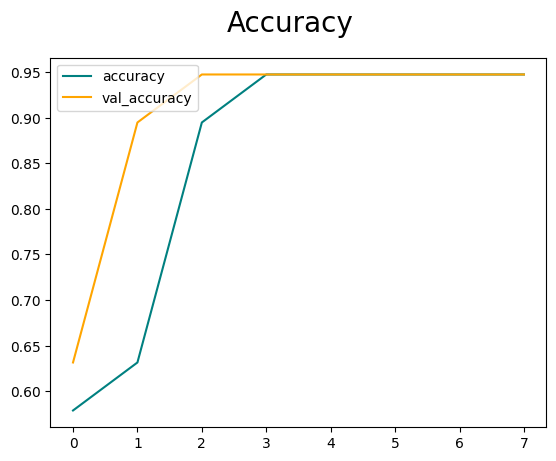

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras.utils import to_categorical

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
  x, y = batch
  y = to_categorical(y, num_classes=8)
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


2023-04-04 22:47:28.325989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [19]
	 [[{{node Placeholder/_0}}]]
2023-04-04 22:47:28.326520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]


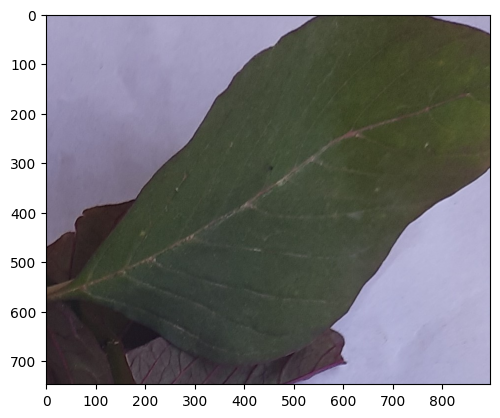

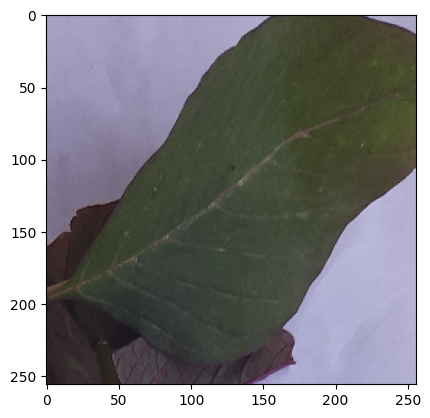

1/1 [==============================] - 0s 53ms/step


array([[9.4782278e-02, 9.0516478e-01, 1.1061568e-06, 1.2750577e-05,
        5.5899040e-06, 8.1372182e-06, 2.3388671e-05, 2.0352943e-06]],
      dtype=float32)

In [39]:
import cv2

img = cv2.imread(f"{full_path}/validation/class_1/20200228_101620_1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
plt.imshow(img.astype('uint8')) # Convert data type to uint8
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

yhat

In [42]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.optimizers import RMSprop

In [45]:
class_names = ['Balloon vine', 'Coriander', 'Karanda', 'Lemon', 'Mint', 'Mustard', 'Not a matching herb','Oleander', 'Pomegranate']


In [47]:
image = load_img(f"{full_path}/validation/class_1/20200228_101620_1.jpg", target_size=(256, 256))
image = img_to_array(image)
image = np.reshape(image,[1,256,256,3])
model.predict(image)

# Get the predicted output probabilities for the input image
output_probabilities = model.predict(image)
# Get the index of the maximum value in the output array
predicted_class_index = np.argmax(output_probabilities)
# Get the name of the predicted class
predicted_class_name = class_names[predicted_class_index]
# Print the predicted class name
print(predicted_class_name)

1/1 [==============================] - 0s 48ms/step
Coriander
